In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install tensorflow==2.18.0 keras==3.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [3]:
# !pip install --upgrade keras tensorflow

In [4]:
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [5]:
print("Tensorflow: " + tf.__version__)
print("keras: " + keras. __version__)

Tensorflow: 2.18.0
keras: 3.6.0


# Import data into tensorflow dataset object

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32 # Here 32 images per batch will be sent to the model for training. # 1 batch = 32 images
CHANNELS=3 # RGB
EPOCHS=50 # train 50 times

In [7]:
location = "/content/drive/MyDrive/Business Automation Ltd./2. Code/Deep Learning/Topic 3: Convolutional Neural Network (CNN)/1. Potato Disease Prediction/"

In [8]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    location + "potato_dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
# total_images = 0

# # Iterate over the dataset and count images
# for batch in dataset:
#     total_images += batch[0].shape[0]  # batch[0] contains the images

# print(f"Total images: {total_images}")

In [11]:
# from collections import Counter

# # Assuming dataset is created as you mentioned
# class_names = dataset.class_names  # List of class names from the dataset

# # Create an empty list to store all the labels
# all_labels = []

# # Iterate over the dataset to collect labels
# for images, labels in dataset:
#     all_labels.extend(labels.numpy())  # Convert the labels to numpy and add them to the list

# # Count the occurrences of each label
# label_counts = Counter(all_labels)

# # If you want to print the counts for each class using class names
# print("Class-wise image counts:")
# for label, count in label_counts.items():
#     print(f"{label}: ({class_names[label]}): {count} images")

In [12]:
for image_batch, labels_batch in dataset.take(1): # 1 batch = 32 images
    print(image_batch.shape) #(Batch, image shape, RGB CHANNELS)
    print(labels_batch.numpy())
# 1: (Potato___Late_blight)
# 0: (Potato___Early_blight)
# 2: (Potato___healthy)

(32, 256, 256, 3)
[0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 2 0 1 0 2 0 1 0 1]


In [13]:
# first image
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[139. 111. 110.]
  [121.  93.  92.]
  [143. 115. 114.]
  ...
  [101.  71.  69.]
  [116.  86.  84.]
  [115.  85.  83.]]

 [[122.  94.  93.]
  [119.  91.  90.]
  [119.  91.  90.]
  ...
  [138. 108. 106.]
  [141. 111. 109.]
  [150. 120. 118.]]

 [[157. 129. 128.]
  [140. 112. 111.]
  [174. 146. 145.]
  ...
  [155. 125. 123.]
  [146. 116. 114.]
  [159. 129. 127.]]

 ...

 [[161. 141. 140.]
  [164. 144. 143.]
  [170. 150. 149.]
  ...
  [196. 178. 174.]
  [191. 173. 169.]
  [184. 166. 162.]]

 [[163. 143. 142.]
  [165. 145. 144.]
  [169. 149. 148.]
  ...
  [205. 187. 183.]
  [211. 193. 189.]
  [209. 191. 187.]]

 [[168. 148. 147.]
  [169. 149. 148.]
  [170. 150. 149.]
  ...
  [208. 190. 186.]
  [208. 190. 186.]
  [199. 181. 177.]]]


In [14]:
# first image
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


# Visualize some of the images from our dataset

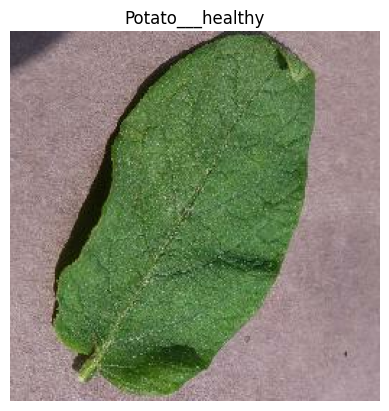

In [15]:
for image_batch, labels_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[0]])
    plt.axis("off")

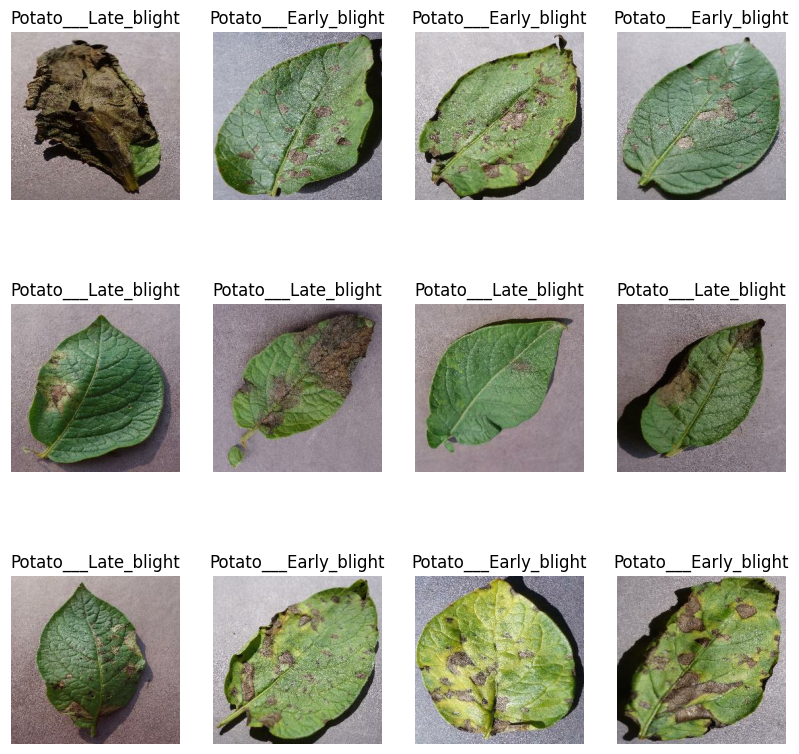

In [16]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [17]:
len(dataset)

68

In [18]:
len(dataset) * BATCH_SIZE # actual length

2176

# Function to Split Dataset

1. 80% ==> training
2. 20% ==> 10 validation, 10% test

### Train Validation Test

#### Train Data

In [19]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [20]:
train_ds = dataset.take(54)
len(train_ds)

54

#### Test

In [21]:
test_ds = dataset.skip(54)
len(test_ds)

14

#### validation Data

In [22]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [23]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

#### Final Test Data

In [24]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [25]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [26]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [27]:
len(train_ds)

54

In [28]:
len(val_ds)

6

In [29]:
len(test_ds)

8

# Cache, Shuffle, and Prefetch the Dataset

In [30]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building the Model

### Creating a Layer for Resizing and Normalization

In [31]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),    # Resizing layer # all image in same size
    layers.Rescaling(1./255)                    # Rescaling layer # 0 to 1
])

### Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [32]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Random flip horizontally and vertically
    # layers.RandomRotation(0.2)                     # Random rotation up to 20%
    layers.RandomRotation(factor=[-0.2, 0.2], fill_mode='reflect', fill_value=0.0, interpolation='bilinear', seed=None)
])# example: 1 image to 5 image

### Model Architecture (CNN)
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [33]:
# Model parameters
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Define the input shape for the model
n_classes = 3  # Number of output classes for classification

# Build the model
model = models.Sequential([

    resize_and_rescale,  # Preprocessing step to resize and normalize image data (not shown but assumed to be a layer or function)
    data_augmentation,

    # First convolutional block
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape), # - Conv2D layer: 32 filters, 3x3 kernel size. # - ReLU activation: converts negative values to 0, keeps positive values the same.
    layers.MaxPooling2D((2, 2)), # - MaxPooling2D: reduces the spatial dimensions by selecting the maximum pixel value in each 2x2 block.

    # Second convolutional block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Fourth convolutional block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Fifth convolutional block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Sixth convolutional block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(), # - Flatten: converts the 2D feature maps into a 1D vector for the fully connected layers.

    # Fully connected layers
    layers.Dense(64, activation='relu'),  # - Dense (fully connected) layer with 64 neurons and ReLU activation to learn high-level representations. # 64 newrons
    layers.Dense(n_classes, activation='softmax')  # - Output Dense layer with `n_classes` neurons (one for each class). # - Softmax activation: outputs probabilities for multi-class classification (each class gets a probability score summing to 1).
]) # 3 newrons/Denses

# Build the model with the specified input shape
model.build(input_shape=input_shape)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
# Define the ModelCheckpoint callback
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    location + 'saved_models/best_model.keras',  # Path to save the best model
    monitor='val_accuracy',   # Metric to monitor
    save_best_only=True,      # Save only the best model
    mode='max',               # Maximize the monitored metric
    verbose=1
)

In [37]:
# Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[checkpoint],    # Add the callback here
    verbose=1
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4648 - loss: 0.9446
Epoch 1: val_accuracy improved from -inf to 0.63021, saving model to /content/drive/MyDrive/Business Automation Ltd./2. Code/Deep Learning/Topic 3: Convolutional Neural Network (CNN)/1. Potato Disease Prediction/saved_models/best_model2.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 403s 212ms/step - accuracy: 0.4654 - loss: 0.9435 - val_accuracy: 0.6302 - val_loss: 0.7173
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6829 - loss: 0.6677
Epoch 2: val_accuracy improved from 0.63021 to 0.79688, saving model to /content/drive/MyDrive/Business Automation Ltd./2. Code/Deep Learning/Topic 3: Convolutional Neural Network (CNN)/1. Potato Disease Prediction/saved_models/best_model2.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 67ms/step - accuracy: 0.6837 - loss: 0.6662 - val_accuracy: 0.7969 - val_loss: 0.4625
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8244 - loss: 0.4248
Epoch 3: val_accurac

In [38]:
# Save the trained model
# model.save(location + 'saved_models/my_model.keras')

**Check accuracy**

In [39]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9882 - loss: 0.0374


In [40]:
scores

[0.030401043593883514, 0.98828125]

### Plotting the Accuracy and Loss Curves

In [41]:
history

In [42]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [43]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [44]:
history.history['loss']

[0.8846644163131714,
 0.5829238295555115,
 0.43873003125190735,
 0.34728673100471497,
 0.3088311553001404,
 0.2285458743572235,
 0.20171299576759338,
 0.14545905590057373,
 0.09877920895814896,
 0.15058816969394684,
 0.07183409482240677,
 0.07061702013015747,
 0.04189155250787735,
 0.084504634141922,
 0.0622032955288887,
 0.06570611894130707,
 0.07305227220058441,
 0.03455161303281784,
 0.022416213527321815,
 0.031631093472242355,
 0.0314793735742569,
 0.07311047613620758,
 0.051606278866529465,
 0.025933561846613884,
 0.0750473365187645,
 0.039770860224962234,
 0.024886831641197205,
 0.01605062372982502,
 0.0650748610496521,
 0.062271445989608765,
 0.02300804667174816,
 0.02397657372057438,
 0.08117681741714478,
 0.042979124933481216,
 0.030582245439291,
 0.03114522621035576,
 0.02354871854186058,
 0.02444526180624962,
 0.010253076441586018,
 0.014019335620105267,
 0.024773187935352325,
 0.015578539110720158,
 0.031573668122291565,
 0.016615375876426697,
 0.018700361251831055,
 0.0141

In [45]:
type(history.history['loss'])

list

In [46]:
len(history.history['loss'])

50

In [47]:
history.history['loss'][:20] # show loss for first 20 epochs

[0.8846644163131714,
 0.5829238295555115,
 0.43873003125190735,
 0.34728673100471497,
 0.3088311553001404,
 0.2285458743572235,
 0.20171299576759338,
 0.14545905590057373,
 0.09877920895814896,
 0.15058816969394684,
 0.07183409482240677,
 0.07061702013015747,
 0.04189155250787735,
 0.084504634141922,
 0.0622032955288887,
 0.06570611894130707,
 0.07305227220058441,
 0.03455161303281784,
 0.022416213527321815,
 0.031631093472242355]

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [49]:
print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.4982638955116272, 0.7245370149612427, 0.8136574029922485, 0.8535879850387573, 0.8697916865348816, 0.8975694179534912, 0.9178240895271301, 0.9438657164573669, 0.9670138955116272, 0.9467592835426331, 0.9774305820465088, 0.9722222089767456, 0.9872685074806213, 0.9693287014961243, 0.9762731194496155, 0.9791666865348816, 0.9704861044883728, 0.9855324029922485, 0.9924768805503845, 0.9890046119689941, 0.9878472089767456, 0.9739583134651184, 0.9791666865348816, 0.9895833134651184, 0.9739583134651184, 0.9878472089767456, 0.9913194179534912, 0.9936342835426331, 0.9797453880310059, 0.9774305820465088, 0.9936342835426331, 0.9936342835426331, 0.9693287014961243, 0.9837962985038757, 0.9895833134651184, 0.9895833134651184, 0.9918981194496155, 0.9907407164573669, 0.9965277910232544, 0.9971064925193787, 0.9924768805503845, 0.9953703880310059, 0.9884259104728699, 0.9924768805503845, 0.9942129850387573, 0.9942129850387573, 0.9924768805503845, 0.9699074029922485, 0.9913194179534912, 0.9959490895271301]

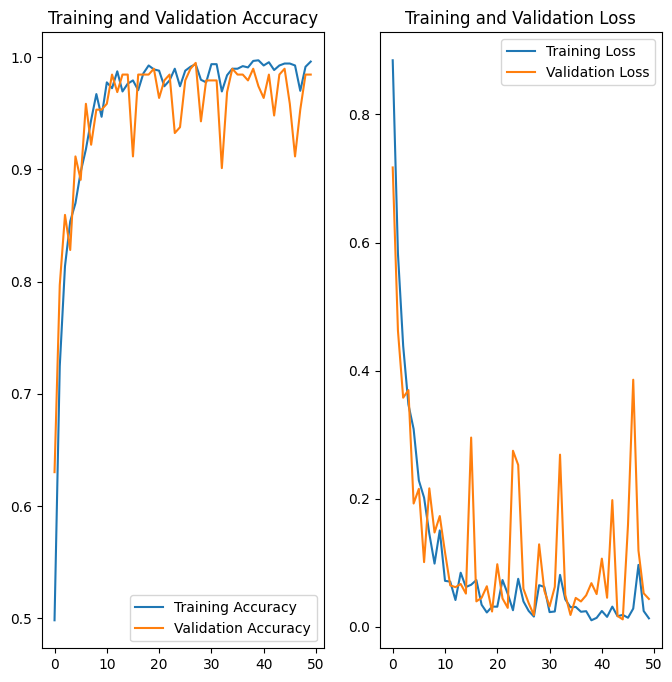

In [50]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predict

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
predicted label: Potato___Late_blight


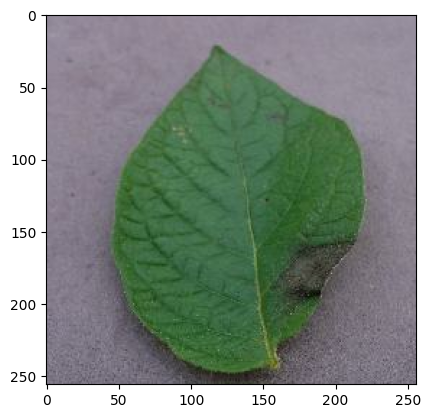

In [51]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

### Write a function for inference

In [52]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

In [53]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

# Saving the Model
We append the model to the list of models as a new version

In [54]:
# import os
# model_version=max([int(i) for i in os.listdir("saved_models") + [0]])+1
# model.save(f"saved_models/{model_version}")

In [55]:
# Save the model using the .keras format (recommended)
# model.save(f"{location}saved_models/PotatoModel.keras")
# print("Model saved at PotatoModel.keras")

In [56]:
# model.save(f"{location}saved_models/PotatoModel.h5")
# print("Model saved at PotatoModel.h5")

In [57]:
# import pickle
# with open(location+'saved_models/model_pickle','wb') as file:
#     pickle.dump(model,file)

In [58]:
# import joblib as jbl
# jbl.dump(model,location + 'saved_models/My_JobModel')